✅ Saved: plots/CNN_Accuracy.png
✅ Saved: plots/CNN_F1.png
✅ Saved: plots/CNN_Loss.png


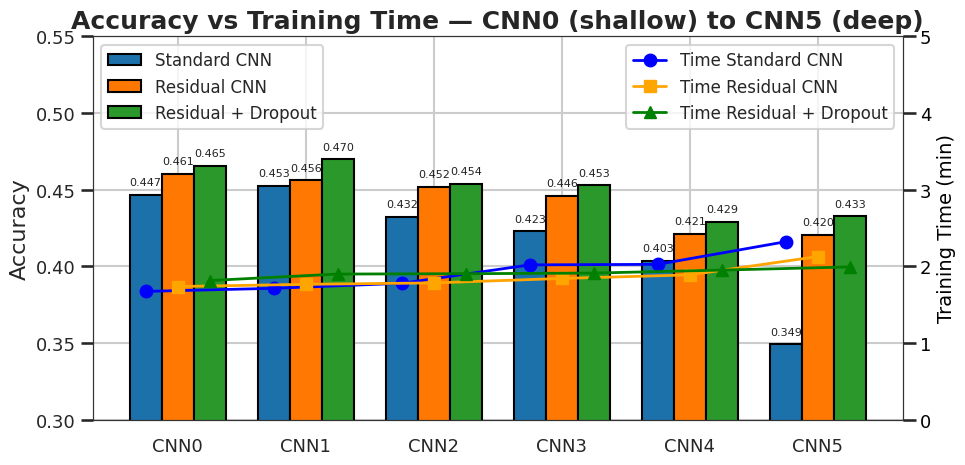

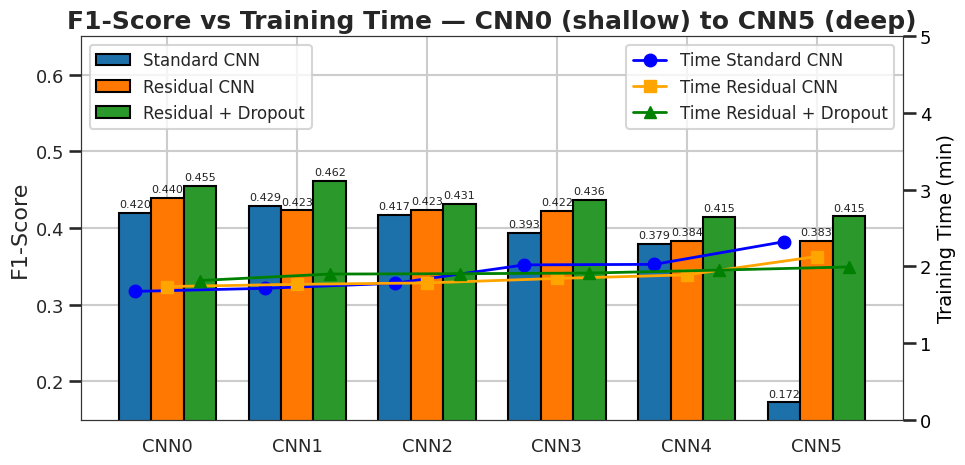

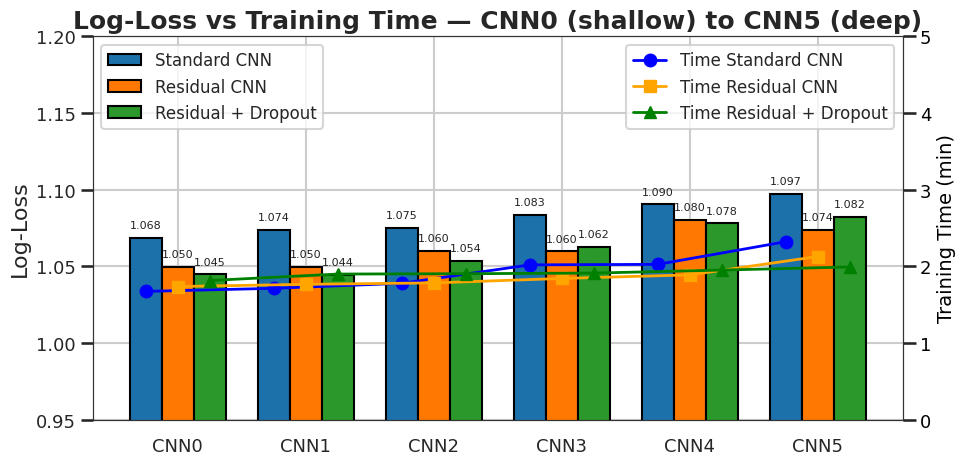

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mc
import colorsys

# === 1. Load CSV ===
df = pd.read_csv("metrics_cnn3.csv")

# === 1.1 Convert Time (seconds → minutes) ===
df["Time"] = df["Time"] / 60.0  # convert to minutes

# === 2. Output folder ===
os.makedirs("plots", exist_ok=True)

# === 3. Global style ===
sns.set_theme(style="whitegrid", context="talk")
plt.rcParams.update({
    "figure.figsize": (10, 5),
    "axes.edgecolor": "#333333",
    "axes.linewidth": 0.8,
    "axes.titlesize": 18,
    "axes.labelsize": 16,
    "xtick.labelsize": 13,
    "ytick.labelsize": 13
})

# === 4. Color utilities ===
def adjust_lightness(color, factor=1.0):
    """Lighten/darken color by multiplying luminance."""
    try:
        c = mc.cnames[color]
    except:
        c = color
    h, l, s = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(h, max(0, min(1, l * factor)), s)

# Colors for three types
base_color = "#1f77b4"   # Standard CNN
alt_color  = "#ff7f0e"   # Residual CNN
drop_color = "#2ca02c"   # Residual + Dropout
color_map  = {
    "Standard CNN": adjust_lightness(base_color, 0.95),
    "Residual CNN": adjust_lightness(alt_color, 0.95),
    "Residual + Dropout": adjust_lightness(drop_color, 0.95)
}

# === 5. Plot helper ===
def plot_metric(metric_name, ylabel, save_name):
    fig, ax1 = plt.subplots(figsize=(10, 5))
    bar_width = 0.25  # 3 bars per group

    models = sorted(df["Model"].unique())
    x = range(len(models))

    # Separate values for bars and time
    vals_std, vals_res, vals_drop = [], [], []
    time_std, time_res, time_drop = [], [], []

    for m in models:
        std = df[(df["Model"] == m) & (df["Connnection"] == "Standard CNN")]
        res = df[(df["Model"] == m) & (df["Connnection"] == "Residual CNN")]
        drop = df[(df["Model"] == m) & (df["Connnection"] == "Residual + Dropout")]

        vals_std.append(std[metric_name].values[0] if not std.empty else None)
        vals_res.append(res[metric_name].values[0] if not res.empty else None)
        vals_drop.append(drop[metric_name].values[0] if not drop.empty else None)

        time_std.append(std["Time"].values[0] if not std.empty else None)
        time_res.append(res["Time"].values[0] if not res.empty else None)
        time_drop.append(drop["Time"].values[0] if not drop.empty else None)

    # Bar offsets
    offsets_std  = [i - bar_width for i in x]
    offsets_res  = [i for i in x]
    offsets_drop = [i + bar_width for i in x]

    # === Primary axis: bars for metrics ===
    bars_std  = ax1.bar(offsets_std, vals_std, width=bar_width,
                        color=color_map["Standard CNN"], edgecolor="black", label="Standard CNN")
    bars_res  = ax1.bar(offsets_res, vals_res, width=bar_width,
                        color=color_map["Residual CNN"], edgecolor="black", label="Residual CNN")
    bars_drop = ax1.bar(offsets_drop, vals_drop, width=bar_width,
                        color=color_map["Residual + Dropout"], edgecolor="black", label="Residual + Dropout")

    # Add numeric labels on bars
    for bars in [bars_std, bars_res, bars_drop]:
        for bar in bars:
            h = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2, h + 0.005, f"{h:.3f}",
                     ha="center", va="bottom", fontsize=8, color="#222222")

    ax1.set_xticks(range(len(models)))
    ax1.set_xticklabels(models)
    ax1.set_ylabel(ylabel)
    ax1.set_title(f"{metric_name} vs Training Time — CNN0 (shallow) to CNN5 (deep)", weight="bold")

    # === Set y-axis range for metric (optional) ===
    if metric_name in ["Accuracy"]:
        ax1.set_ylim(0.30, 0.55)
    if metric_name in ["F1-Score"]:
        ax1.set_ylim(0.15, 0.65)
    elif metric_name == "Log-Loss":
        ax1.set_ylim(0.95, 1.20)

    # === Secondary axis: line for training time (all three) ===
    ax2 = ax1.twinx()
    ax2.grid(False)
    ax2.plot(offsets_std, time_std, color="blue", marker="o", linewidth=2, label="Time Standard CNN")
    ax2.plot(offsets_res, time_res, color="orange", marker="s", linewidth=2, label="Time Residual CNN")
    ax2.plot(offsets_drop, time_drop, color="green", marker="^", linewidth=2, label="Time Residual + Dropout")
    ax2.set_ylabel("Training Time (min)", fontsize=14, color="black")
    ax2.tick_params(axis="y", labelcolor="black")

    # Optional: y-axis ticks for time
    ax2.set_yticks(range(0, 6, 1))

    # === Legends ===
    ax1.legend(loc="upper left", fontsize=12)
    ax2.legend(loc="upper right", fontsize=12)

    fig.tight_layout()
    save_path = f"plots/{save_name}.png"
    plt.savefig(save_path, dpi=300, bbox_inches="tight")
    print(f"✅ Saved: {save_path}")

# === 6. Generate plots ===
plot_metric("Accuracy", "Accuracy", "CNN_Accuracy")
plot_metric("F1-Score", "F1-Score", "CNN_F1")
plot_metric("Log-Loss", "Log-Loss", "CNN_Loss")